# AFFINE TRANSFORM

In [21]:
import numpy as np
import tensorflow as tf
import scipy

In [22]:
def load_dataset():
    (x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
    return (x_train,y_train),(x_test,y_test)

In [23]:
(train_data,train_label),(test_data,test_label)=load_dataset()

# Visualization

In [24]:
import matplotlib.pyplot as plt

[]

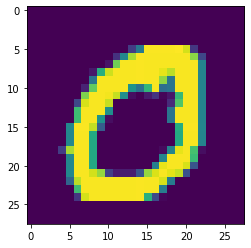

In [25]:
img=train_data[51]
plt.imshow(img)
plt.plot()

# Formula calculations

In [26]:
a=[a for a in range(28)]
b=[a for a in range(28)]

x,y=np.mgrid[:28,:28]

## Finding the coordinates of centroid (x_mean, y_mean)

In [27]:
def find_means(x,y,data):
    x_mean=np.sum(x*data)/(np.sum(data))
    y_mean=np.sum(y*data)/(np.sum(data))
    
    return x_mean,y_mean

In [28]:
x_mean,y_mean=find_means(x,y,train_data[3])

In [29]:
x_mean,y_mean

(14.487540122556172, 13.99346367084914)

## Covariance matrix
## Correlation : corr(x,y) = u_11/u_20 , where u_11 and u_20 are first and second moments respectively

In [30]:
def find_covar_mat_and_corr(x,y,data):
    u_20=np.sum(((x-x_mean)**2)*data)
    u_02=np.sum(((y-y_mean)**2)*data)
    u_11=np.sum(((x-x_mean)*(y-y_mean))*data)
    u_00=np.sum(data)
    
    corr=u_11/u_20
    covar_mat=[[u_20/u_00,u_11/u_00],[u_11/u_00,u_02/u_00]]
#     corr=u_11/u
    return covar_mat,corr

In [31]:
find_covar_mat_and_corr(x,y,train_data[3])

([[31.80782549262712, -17.910615436607745],
  [-17.910615436607745, 11.384958735403274]],
 -0.5630883331134764)

## Finding the angle of rotation (instead of using angle of rotation, we can simply use correlation matrix)

In [32]:
m,corr=find_covar_mat_and_corr(x,y,train_data[3])
angle=-1*0.5*np.arctan((2*m[0][1])/(m[0][0]-m[1][1]))

In [33]:
angle

0.526313699716085

## Finding the rotation matrix

### Instead of [[cos(theta),-sin(theta)],[sin(theta),cos(theta)]] , we can use :
### rotation_matrix = correlation_matrix = [[1,0],[corr(x,y),1]]

In [34]:
# corr_matrix=u_
# rot_mat=[[np.cos(angle),-1*np.sin(angle)],[np.sin(angle),np.cos(angle)]]
rot_mat=[[1,0],[corr,1]]

In [35]:
rot_mat

[[1, 0], [-0.5630883331134764, 1]]

# Finding offset for scipy.ndimage.affine_transform

## centroid = np.dot(matrix, o) + offset
## Therefore, offset=centroid - np.dot(matrix, o)

### Calculating the offset for scipy affine_transform function

In [36]:
offset=[x_mean,y_mean]-np.dot(rot_mat,[14,14])

In [37]:
offset

array([0.48754012, 7.87670033])

## Applying affine transform on image

In [38]:
from scipy.ndimage import affine_transform

In [39]:
def final_image(image):
    final_img=affine_transform(image,rot_mat,offset=offset)
    return final_img

In [40]:
for i in range(len(train_data)):
    x_mean,y_mean=find_means(x,y,train_data[i])
    covar_mat,corr=find_covar_mat_and_corr(x,y,train_data[i])
    rot_mat=[[1,0],[corr,1]]
    offset=[x_mean,y_mean]-np.dot(rot_mat,[14,14])
    train_data[i]=final_image(train_data[i])

# Show image by index

In [41]:
def show_final_image(index):
    plt.imshow(train_data[index])

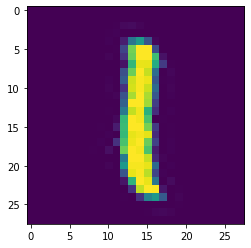

In [42]:
show_final_image(4)